In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#import the car sensor data

df_RL = pd.read_csv('RLWheelSpeed.csv')
df_RR = pd.read_csv('RRWheelSpeed.csv')

m = 0.2008
b = 0

#transform with (data-b)/m

df_RL[' value'] = (df_RL[' value'] - b)/m

df_RR[' value'] = (df_RR[' value'] - b)/m



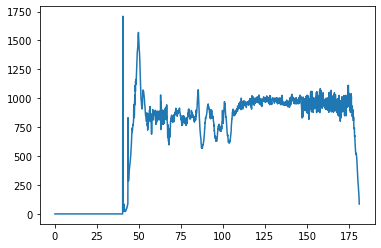

In [24]:
#start with RL
#import the gps csv

df_gps = pd.read_csv('_GPS.csv')

df_gps[' speed']

#plot the data

plt.plot(df_RL['time'],df_RL[' value'])

plt.show()





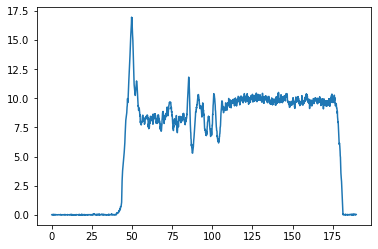

In [25]:
plt.plot(df_gps['time'],df_gps[' speed'])

plt.show()

In [29]:
#at every time, calculate df_gps[' speed'] / df_RL[' value']
#compile them in a list

ratio = []


#cut the end of the gps data to match the length of the wheel speed data

df_gps = df_gps[:len(df_RL['time'])]




1812
1897
1812
1812


/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_10105/1709789185.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  ratio.append(df_gps[' speed'][i] / df_RL[' value'][i])
/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_10105/1709789185.py:4: RuntimeWarning: invalid value encountered in scalar divide
  ratio.append(df_gps[' speed'][i] / df_RL[' value'][i])


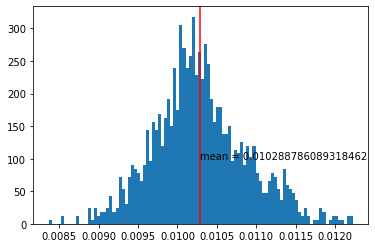

In [35]:
#for all time, compile what df_gps[' speed'] / df_RL[' value'] is

for i in range(len(df_RL['time'])):
    ratio.append(df_gps[' speed'][i] / df_RL[' value'][i])


ratio

#get rid of inf, -inf, and nan

ratio = [x for x in ratio if str(x) != 'nan']
ratio = [x for x in ratio if str(x) != 'inf']
ratio = [x for x in ratio if str(x) != '-inf']


#get rid of outliers by only including ratios that are within 3 standard deviations of the mean

ratio = [x for x in ratio if x < np.mean(ratio) + 3*np.std(ratio)]

ratio = [x for x in ratio if x > np.mean(ratio) - 3*np.std(ratio)]

#plot a histogram of the ratios

plt.hist(ratio, bins = 100)

#put a line through the ecenter of the histogram and label what ratio it is at

plt.axvline(np.mean(ratio), color = 'red')

plt.text(np.mean(ratio), 100, 'mean = ' + str(np.mean(ratio)))

plt.show()

/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_10105/101052558.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_2.append(df_gps[' speed'][i] / df_RR[' value'][i])
/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_10105/101052558.py:6: RuntimeWarning: invalid value encountered in scalar divide
  ratio_2.append(df_gps[' speed'][i] / df_RR[' value'][i])


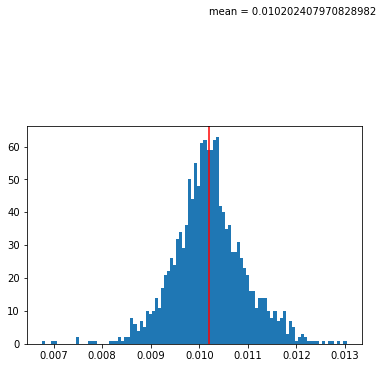

In [37]:
#now lets do the same thing for the right rear wheel

ratio_2 = []

for i in range(len(df_RR['time'])):
    ratio_2.append(df_gps[' speed'][i] / df_RR[' value'][i])

ratio_2 = [x for x in ratio_2 if str(x) != 'nan']
ratio_2 = [x for x in ratio_2 if str(x) != 'inf']
ratio_2 = [x for x in ratio_2 if str(x) != '-inf']

ratio_2 = [x for x in ratio_2 if x < np.mean(ratio_2) + 3*np.std(ratio_2)]

ratio_2 = [x for x in ratio_2 if x > np.mean(ratio_2) - 3*np.std(ratio_2)]

plt.hist(ratio_2, bins = 100)

plt.axvline(np.mean(ratio_2), color = 'red')

plt.text(np.mean(ratio_2), 100, 'mean = ' + str(np.mean(ratio_2)))

plt.show()
